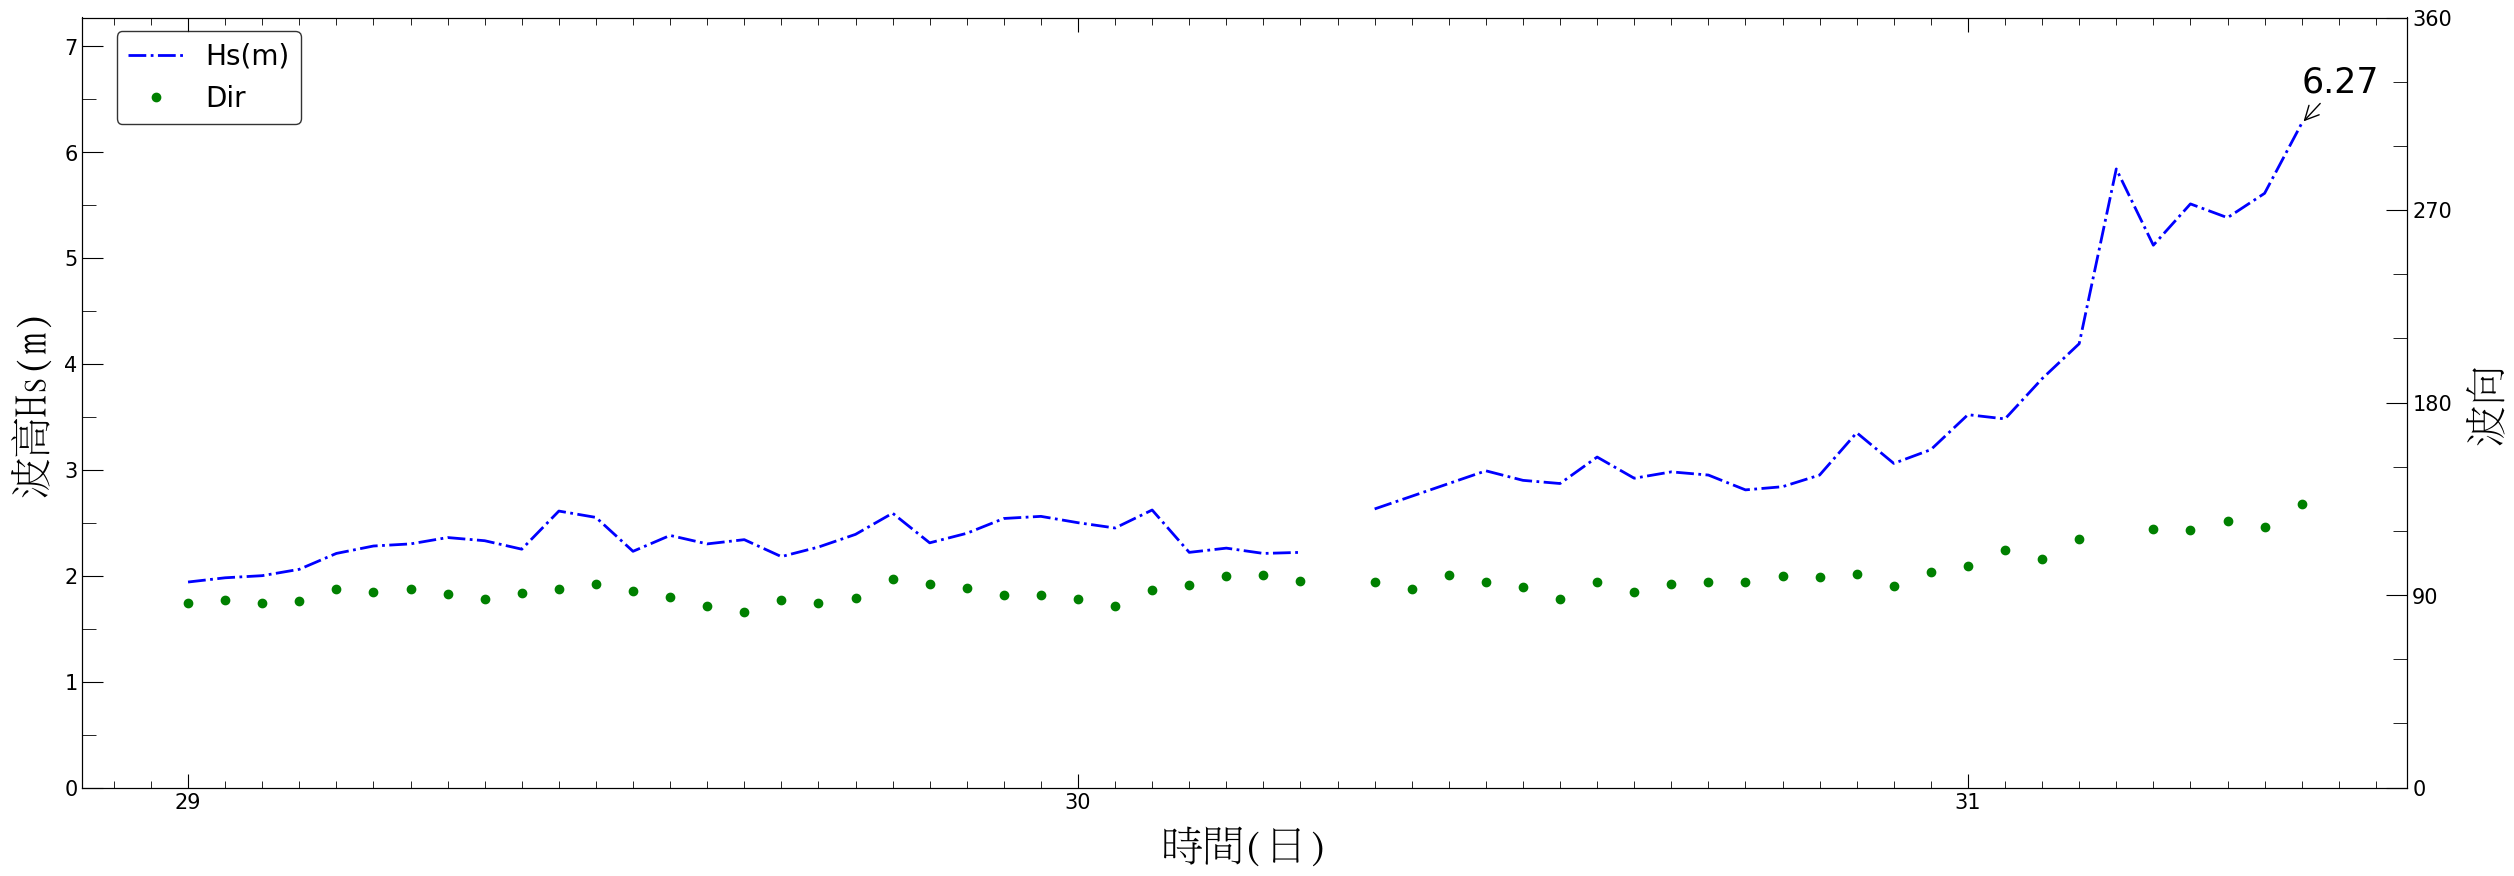

In [15]:
#畫颱風期間歷線圖
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font
import pandas as pd
import matplotlib.dates as mdates

# 設定字型
font1 = font(fname="c:\\WINDOWS\\FONTS\\MINGLIU.TTC")

# 讀取 CSV 檔案
df = pd.read_csv('storm.csv')

# 確保 'Date_Time' 欄位為日期格式
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# 設定索引
index = df['Date_Time']
values1 = df['港外波高_HS(主站)']
direction = df['波向(主站)']


# 繪圖
figure = plt.figure(figsize=(30, 10))
axes1 = figure.add_subplot()
plt.ylabel('波高Hs(m)', fontproperties=font1, fontsize=30,labelpad=10)
plt.xlabel('時間(日)', fontproperties=font1, fontsize=30,labelpad=10)
axes2=axes1.twinx()

axes1.plot(index, values1, 'b-.', label='Hs(m)',linewidth=2)
axes2.plot(index, direction, 'g.', label='Dir',markersize=12)

# 計算觀測港外波高最大值
maxobs1_value = values1.max()


# 設定 x 軸格式
axes1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # 只顯示日期的數字
axes1.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 每一天的主要刻度
axes1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # 從 01 日的半天開始，每隔一天出現一次小刻度
axes2.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # 只顯示日期的數字
axes2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 每一天的主要刻度
axes2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # 從 01 日的半天開始，每隔一天出現一次小刻度

# 設定 y 軸格式
axes1.yaxis.set_major_locator(plt.MultipleLocator(1))  # 1m 一個主要刻度
axes1.yaxis.set_minor_locator(plt.MultipleLocator(0.5))  # 0.5m 一個小刻度
axes1.set_ylim(0, maxobs1_value+1)  # y 軸範圍設定為 0 至 最大值+1
axes2.set_ylim(0,360)  # y 軸範圍設定為 0 至 360
axes2.yaxis.set_major_locator(plt.MultipleLocator(90))  # 90度 一個主要刻度
axes2.yaxis.set_minor_locator(plt.MultipleLocator(30))  # 30度 一個小刻度
axes2.set_ylabel('波向', fontproperties=font1, fontsize=30,labelpad=10)

#加入數值標籤
max1_date = index[values1==maxobs1_value]
tag=str(maxobs1_value)
axes1.annotate(tag, xy=(max1_date, maxobs1_value), xytext=(max1_date, maxobs1_value+0.3), arrowprops =dict ( arrowstyle='->'), fontsize=25)

# 刻度向內，並設定不同長度的刻度
#axes1.tick_params(axis='x', which='major', top='true', labeltop='true', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
#axes1.tick_params(axis='x', which='minor',  top='true', labeltop='true',direction='in', length=5)   # 半天的小刻度較短
axes1.tick_params(axis='x', which='major', top='true', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
axes1.tick_params(axis='x', which='minor',  top='true', direction='in', length=5)   # 半天的小刻度較短
axes1.tick_params(axis='y', which='major', direction='in', length=15, labelsize=15)  # y 軸整數刻度較長
axes1.tick_params(axis='y', which='minor', direction='in', length=10)   # y 軸小刻度較短
axes2.tick_params(axis='y', which='major', direction='in', length=15, labelsize=15)  # y 軸整數刻度較長
axes2.tick_params(axis='y', which='minor', direction='in', length=10)   # y 軸小刻度較短
axes2.tick_params(axis='x', which='major', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
axes2.tick_params(axis='x', which='minor', direction='in', length=5)   # 半天的小刻度較短

# 加上圖例，並設置中文字型與較大字體
#axes1.legend(loc='upper right', edgecolor='#000', fontsize=35)
#axes2.legend(loc='upper right', edgecolor='#000', fontsize=35)
figure.legend(loc=1, bbox_to_anchor=(0.1,1), bbox_transform=axes1.transAxes, edgecolor='#000', fontsize=20)

plt.show()


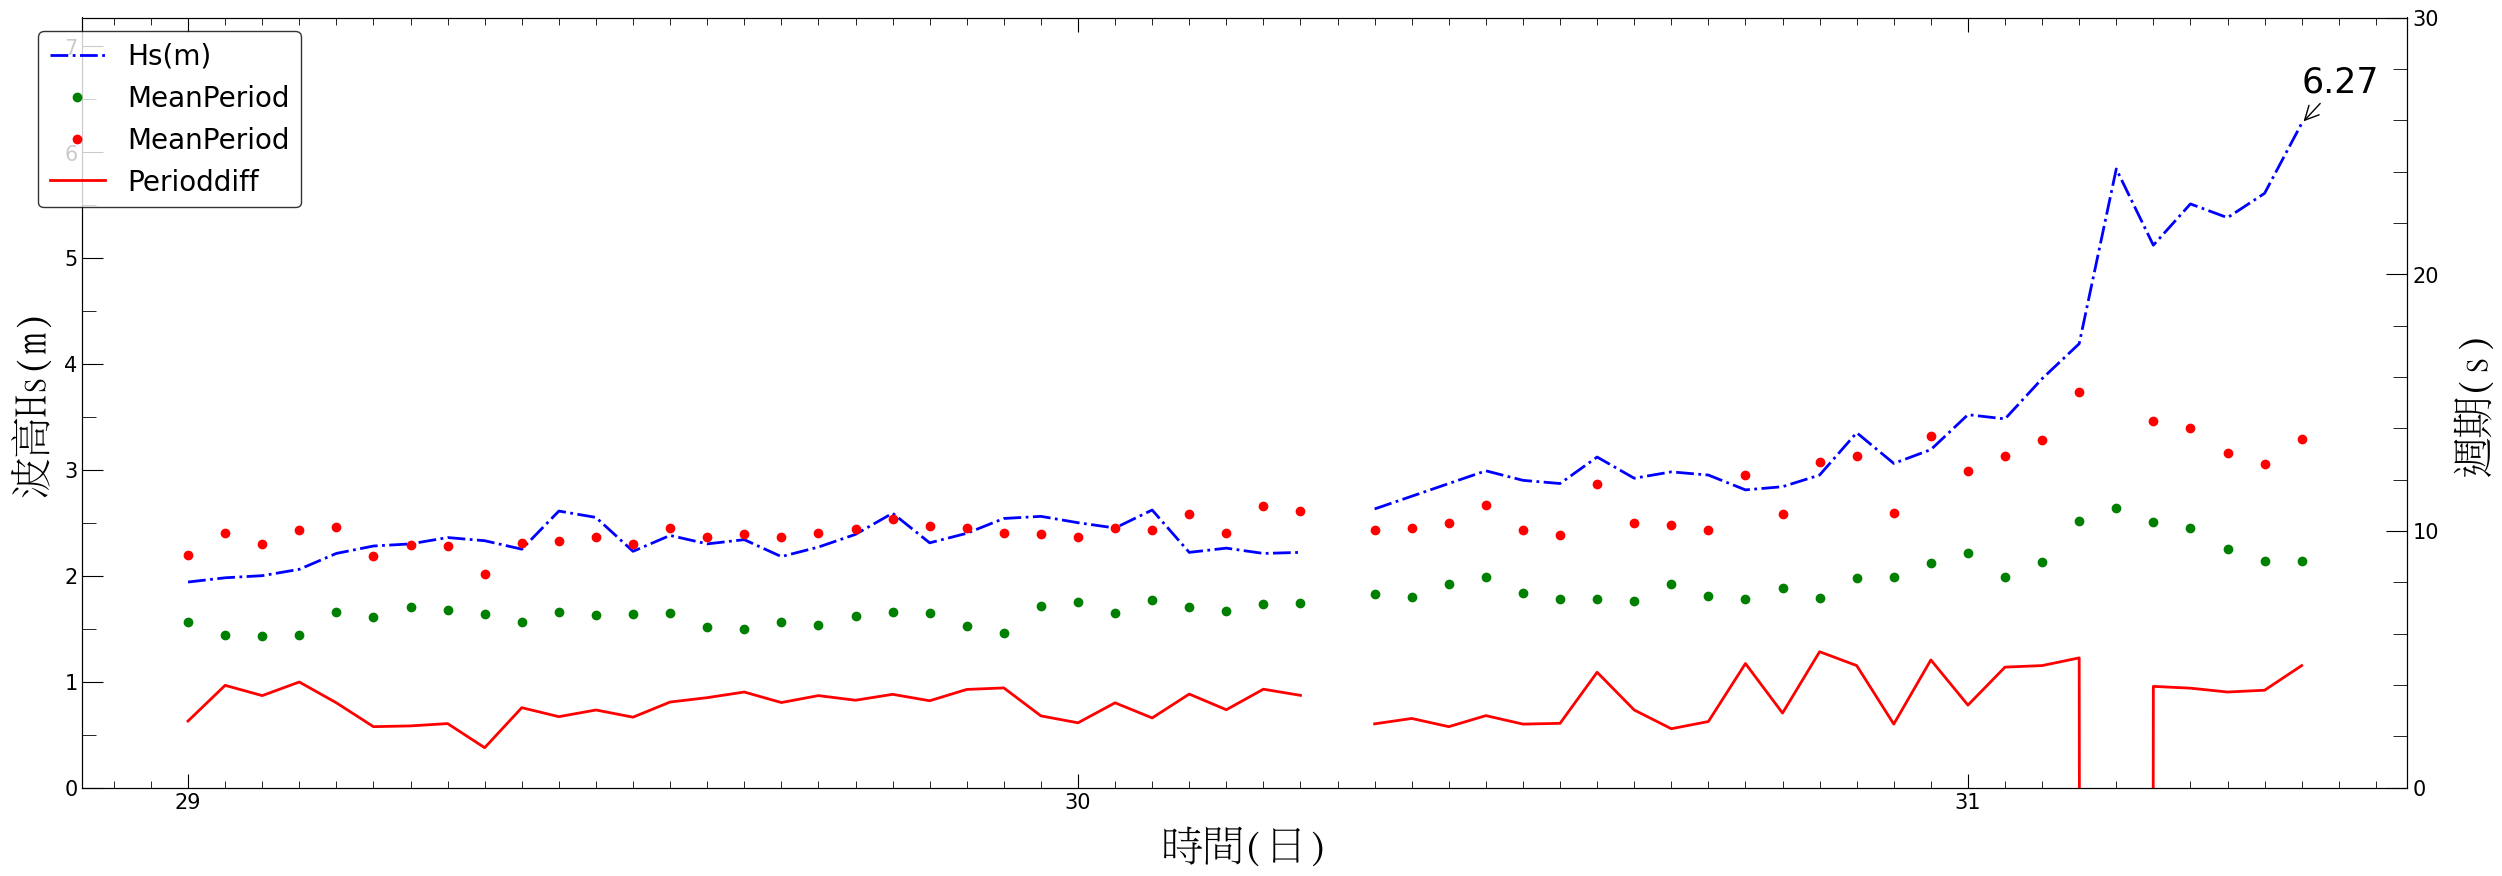

In [21]:
#畫颱風期間歷線圖
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font
import pandas as pd
import matplotlib.dates as mdates

# 設定字型
font1 = font(fname="c:\\WINDOWS\\FONTS\\MINGLIU.TTC")

# 讀取 CSV 檔案
df = pd.read_csv('storm.csv')

# 確保 'Date_Time' 欄位為日期格式
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# 設定索引
index = df['Date_Time']
values1 = df['港外波高_HS(主站)']
meanperiod = df['平均週期(主站)']
peakperiod = df['尖峰週期(主站)']
perioddiff=peakperiod-meanperiod


# 繪圖
figure = plt.figure(figsize=(30, 10))
axes1 = figure.add_subplot()
plt.ylabel('波高Hs(m)', fontproperties=font1, fontsize=30,labelpad=10)
plt.xlabel('時間(日)', fontproperties=font1, fontsize=30,labelpad=10)
axes2=axes1.twinx()

axes1.plot(index, values1, 'b-.', label='Hs(m)',linewidth=2)
axes2.plot(index, meanperiod, 'g.', label='MeanPeriod',markersize=12)
axes2.plot(index, peakperiod, 'r.', label='MeanPeriod',markersize=12)
axes2.plot(index, perioddiff, 'r-', label='Perioddiff',linewidth=2)

# 計算觀測港外波高最大值
maxobs1_value = values1.max()


# 設定 x 軸格式
axes1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # 只顯示日期的數字
axes1.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 每一天的主要刻度
axes1.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # 從 01 日的半天開始，每隔一天出現一次小刻度
axes2.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # 只顯示日期的數字
axes2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 每一天的主要刻度
axes2.xaxis.set_minor_locator(mdates.HourLocator(interval=1))  # 從 01 日的半天開始，每隔一天出現一次小刻度

# 設定 y 軸格式
axes1.yaxis.set_major_locator(plt.MultipleLocator(1))  # 1m 一個主要刻度
axes1.yaxis.set_minor_locator(plt.MultipleLocator(0.5))  # 0.5m 一個小刻度
axes1.set_ylim(0, maxobs1_value+1)  # y 軸範圍設定為 0 至 最大值+1
axes2.set_ylim(0,30)  # y 軸範圍設定為 0 至 360
axes2.yaxis.set_major_locator(plt.MultipleLocator(10))  # 90度 一個主要刻度
axes2.yaxis.set_minor_locator(plt.MultipleLocator(2))  # 30度 一個小刻度
axes2.set_ylabel('週期(s)', fontproperties=font1, fontsize=30,labelpad=10)

#加入數值標籤
max1_date = index[values1==maxobs1_value]
tag=str(maxobs1_value)
axes1.annotate(tag, xy=(max1_date, maxobs1_value), xytext=(max1_date, maxobs1_value+0.3), arrowprops =dict ( arrowstyle='->'), fontsize=25)

# 刻度向內，並設定不同長度的刻度
#axes1.tick_params(axis='x', which='major', top='true', labeltop='true', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
#axes1.tick_params(axis='x', which='minor',  top='true', labeltop='true',direction='in', length=5)   # 半天的小刻度較短
axes1.tick_params(axis='x', which='major', top='true', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
axes1.tick_params(axis='x', which='minor',  top='true', direction='in', length=5)   # 半天的小刻度較短
axes1.tick_params(axis='y', which='major', direction='in', length=15, labelsize=15)  # y 軸整數刻度較長
axes1.tick_params(axis='y', which='minor', direction='in', length=10)   # y 軸小刻度較短
axes2.tick_params(axis='y', which='major', direction='in', length=15, labelsize=15)  # y 軸整數刻度較長
axes2.tick_params(axis='y', which='minor', direction='in', length=10)   # y 軸小刻度較短
axes2.tick_params(axis='x', which='major', direction='in', length=10, labelsize=15)  # 整數天的主要刻度較長
axes2.tick_params(axis='x', which='minor', direction='in', length=5)   # 半天的小刻度較短

# 加上圖例，並設置中文字型與較大字體
#axes1.legend(loc='upper right', edgecolor='#000', fontsize=35)
#axes2.legend(loc='upper right', edgecolor='#000', fontsize=35)
figure.legend(loc=1, bbox_to_anchor=(0.1,1), bbox_transform=axes1.transAxes, edgecolor='#000', fontsize=20)

plt.show()
